In [1]:
import numpy as np
from keras.models import model_from_json
import cv2
from keras import backend as k
import tensorflow as tf

C:\Users\Bhumit\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Load models from file
load_model = open('not-mnist-model.json', 'r')
json_model = load_model.read()
load_model.close()
model = model_from_json(json_model)
model.load_weights('not-mnist-weights.h5')

In [3]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
__________

In [4]:
import cv2
def image_invert(image):
    img = cv2.imread(image, 0)
    img = np.array(img)
    copy = np.copy(img)
    copy[copy>50] = 0
    copy[copy>0] = 255
    return copy

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

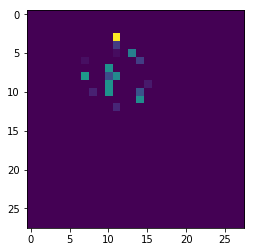

In [189]:
img = image_invert(image='idk.jpg')
img = cv2.resize(img, (28,28))
plt.imshow(img)

In [190]:
print(model.predict_classes(img.reshape(1,28,28,1)))

[0]


In [191]:
top_values, top_indices = k.get_session().run(tf.nn.top_k(model.predict_proba(img.reshape(1,28,28,1)), k=5))

In [192]:
# Classes with percent in descending order
top_indices

array([[0, 8, 7, 5, 9]])

In [193]:
top_values = top_values[0]

In [194]:
float_formatter = lambda x: "%.4f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})
pred_top = top_values * 100

In [195]:
# top 5 probabilities in percent
pred_top

array([99.61455, 0.25394, 0.11419, 0.01183, 0.00548], dtype=float32)

In [196]:
# Top class with percentage
print(pred_top[np.argmax(pred_top)])

99.61455


In [210]:
labels = {0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G', 7:'H', 8:'I', 9:'J'}

In [213]:
labels[0]

'A'

# Percent Prediction Function
<hr></hr>

In [222]:
def percent_probability(model, img, labels):
    '''Image must be preprocessed for network
       For example thresholding, blur, resizing etc
       Returns max prediction percentage for image'''
    # img size may vary
    top_values, top_indices = k.get_session().run(tf.nn.top_k(model.predict_proba(img.reshape(1,28,28,1)), k=5))
    top_indices = top_indices[0]
    top_values = top_values[0]
    float_formatter = lambda x: "%.4f" % x
    np.set_printoptions(formatter={'float_kind':float_formatter})
    pred_top = top_values * 100
    print('Top Probabilities:',pred_top)
    print('Max Confidence Percent:',pred_top[np.argmax(pred_top)])
    print('Identified Class:',(labels[(top_indices[0])]))
    return pred_top[np.argmax(pred_top)]

In [223]:
percent_probability(model, img, labels)

Top Probabilities: [99.6145 0.2539 0.1142 0.0118 0.0055]
Max Confidence Percent: 99.61455
Identified Class: A


99.61455